📂 Please upload cats_and_dogs_filtered.zip


Saving cats_and_dogs_filtered.zip to cats_and_dogs_filtered (1).zip
✅ Uploaded: cats_and_dogs_filtered (1).zip
✅ Dataset Extracted: /content/cats_and_dogs_filtered/train


Loading dogs: 100%|██████████| 100/100 [00:00<00:00, 852.36it/s]


✅ Dataset Loaded -> Shape: (200, 12288)  Labels: (200,)
✅ PCA Reduced Shape: (200, 100)
🚀 Training SVM on 200 samples with PCA...
[LibSVM]
📊 Classification Report:
               precision    recall  f1-score   support

        cats       0.58      0.70      0.64        20
        dogs       0.62      0.50      0.56        20

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40

✅ Accuracy: 0.6

📂 Upload an image (cat or dog) to test:


Saving CatImage.jpeg to CatImage.jpeg


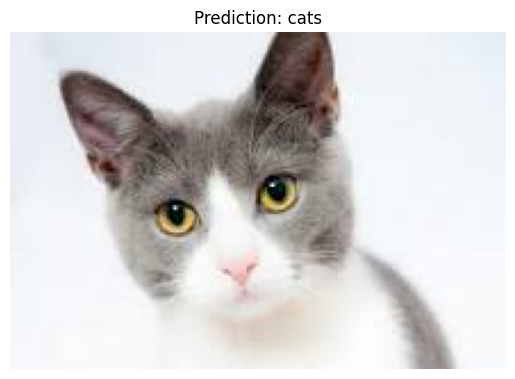

In [3]:
# ================================
# Cats vs Dogs Classification using SVM
# ================================

import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
import random
from google.colab import files

# ================================
# 1. Upload Dataset
# ================================
print("📂 Please upload cats_and_dogs_filtered.zip")
uploaded = files.upload()

zip_path = list(uploaded.keys())[0]
print("✅ Uploaded:", zip_path)

# ================================
# 2. Extract Dataset
# ================================
extract_path = "/content/cats_and_dogs_filtered"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

base_dir = os.path.join(extract_path, "train")
print("✅ Dataset Extracted:", base_dir)

# ================================
# 3. Load and Preprocess Images
# ================================
img_size = 64  # Resize images
data = []
labels = []

categories = ["cats", "dogs"]

for label, category in enumerate(categories):
    folder = os.path.join(base_dir, category)

    # take only 100 random images per class
    files_list = os.listdir(folder)
    random.shuffle(files_list)
    selected_files = files_list[:100]

    for file in tqdm(selected_files, desc=f"Loading {category}"):
        img_path = os.path.join(folder, file)
        try:
            img = image.load_img(img_path, target_size=(img_size, img_size))
            img_array = image.img_to_array(img) / 255.0
            data.append(img_array.flatten())  # flatten to 1D
            labels.append(label)
        except:
            continue

data = np.array(data)
labels = np.array(labels)

print("✅ Dataset Loaded -> Shape:", data.shape, " Labels:", labels.shape)

# ================================
# 4. Apply PCA for Dimensionality Reduction
# ================================
pca = PCA(n_components=100)  # reduce 12,288 features → 100
data_pca = pca.fit_transform(data)

print("✅ PCA Reduced Shape:", data_pca.shape)

# ================================
# 5. Train-Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    data_pca, labels, test_size=0.2, random_state=42, stratify=labels
)

# ================================
# 6. Train SVM Model
# ================================
print("🚀 Training SVM on 200 samples with PCA...")
svm_model = SVC(kernel="linear", verbose=True)
svm_model.fit(X_train, y_train)

# ================================
# 7. Evaluation
# ================================
y_pred = svm_model.predict(X_test)

print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=categories))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# ================================
# 8. Predict on User Input Image
# ================================
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img) / 255.0
    img_array = img_array.flatten().reshape(1, -1)
    img_pca = pca.transform(img_array)  # Apply PCA before prediction
    pred = svm_model.predict(img_pca)[0]
    plt.imshow(image.load_img(img_path))
    plt.title(f"Prediction: {categories[pred]}")
    plt.axis("off")
    plt.show()

# Upload  own image to test
print("\n📂 Upload an image (cat or dog) to test:")
user_upload = files.upload()
user_img_path = list(user_upload.keys())[0]

predict_image(user_img_path)
